In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore




In [22]:
df = pd.read_csv(r'C:\Users\dell-67a\solar-challenge-week1\data\sierraleone-bumbuna.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [23]:
df.describe()



,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [24]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [25]:

missing = df.isna().mean() * 100
missing[missing > 5]

Comments    100.0
dtype: float64

In [26]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[columns_to_check].apply(zscore)

# Flag outliers
outliers = (z_scores.abs() > 3)
print(outliers.sum())

# Handle missing values
df[columns_to_check] = df[columns_to_check].fillna(df[columns_to_check].median())


GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64


In [27]:
df.to_csv(r'C:\Users\dell-67a\solar-challenge-week1\data\sierraleone-bumbuna_cleaned.csv', index=False)


Text(0.5, 1.0, 'Time Series: GHI, DNI, DHI, Tamb')

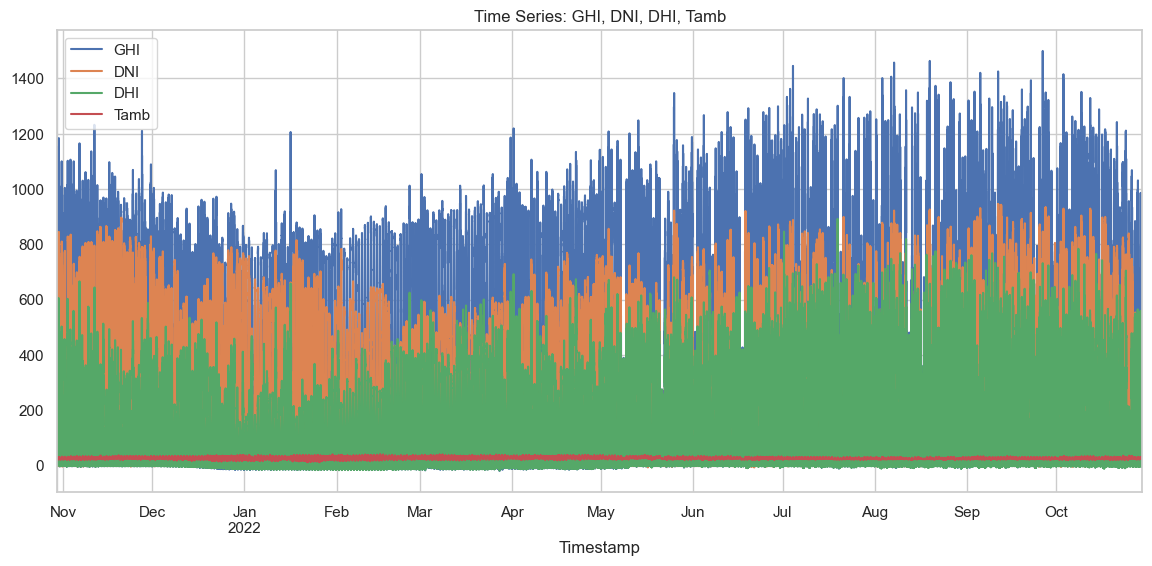

In [28]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(14,6))
plt.title("Time Series: GHI, DNI, DHI, Tamb")
# plt.show()


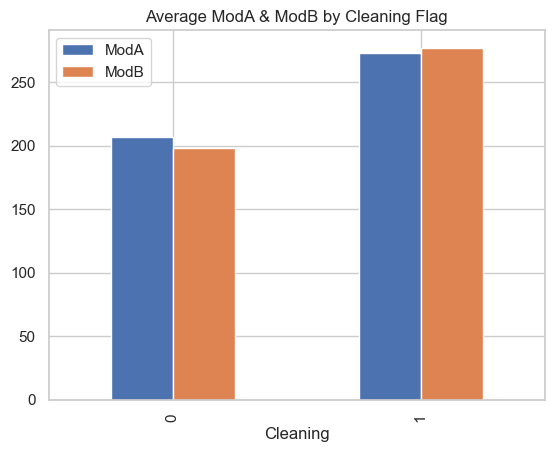

In [29]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Average ModA & ModB by Cleaning Flag")
plt.show()


<Axes: >

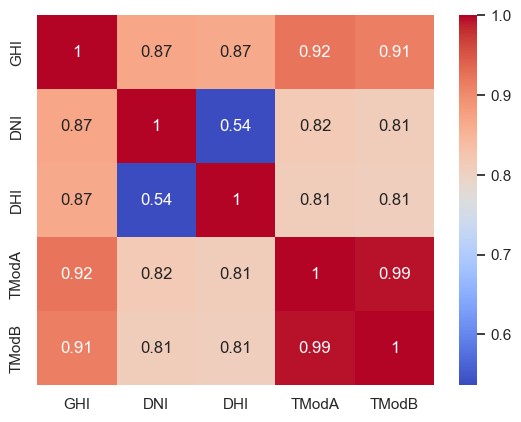

In [30]:
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')


<Axes: xlabel='WS', ylabel='GHI'>

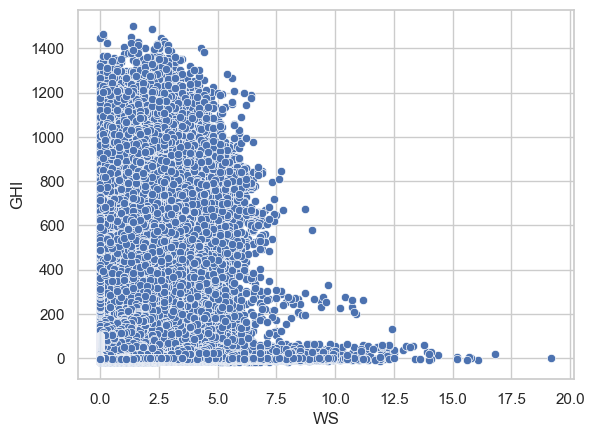

In [31]:
sns.scatterplot(x='WS', y='GHI', data=df)


<Axes: xlabel='RH', ylabel='Tamb'>

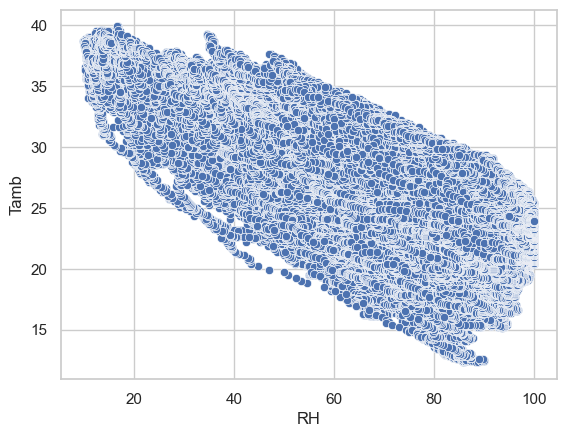

In [32]:
sns.scatterplot(x='RH', y='Tamb', data=df)

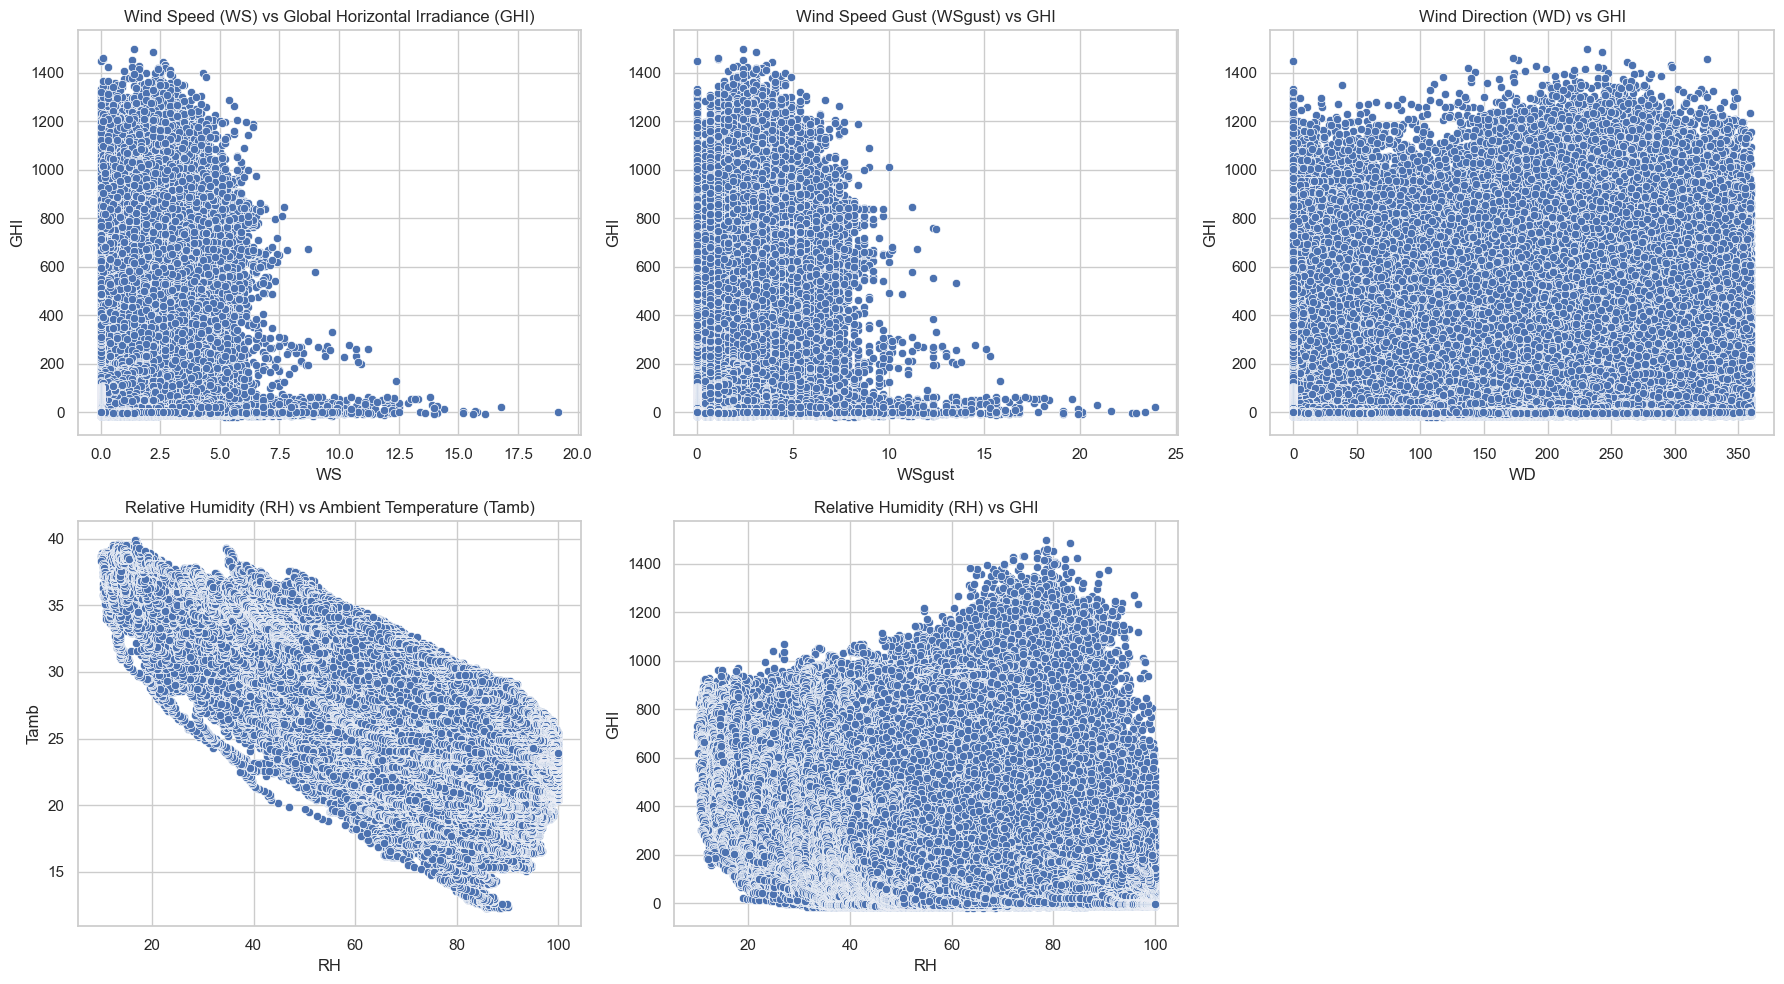

In [33]:
# Set style
sns.set(style="whitegrid")

# Create scatter plots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# WS vs GHI
sns.scatterplot(x='WS', y='GHI', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Wind Speed (WS) vs Global Horizontal Irradiance (GHI)')

# WSgust vs GHI
sns.scatterplot(x='WSgust', y='GHI', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Wind Speed Gust (WSgust) vs GHI')

# WD vs GHI
sns.scatterplot(x='WD', y='GHI', data=df, ax=axs[0, 2])
axs[0, 2].set_title('Wind Direction (WD) vs GHI')

# RH vs Tamb
sns.scatterplot(x='RH', y='Tamb', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Relative Humidity (RH) vs Ambient Temperature (Tamb)')

# RH vs GHI
sns.scatterplot(x='RH', y='GHI', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Relative Humidity (RH) vs GHI')

# Hide last subplot (empty)
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


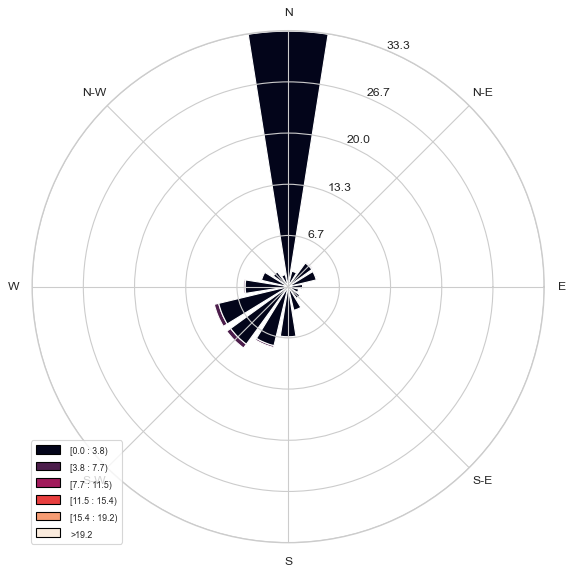

In [34]:
!pip install windrose
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()


Text(0, 0.5, 'Frequency')

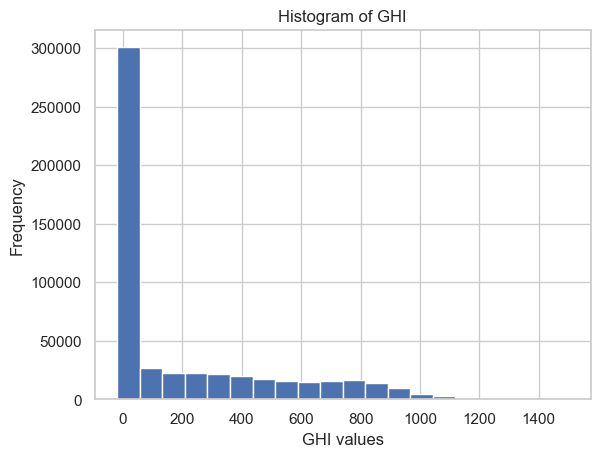

In [35]:
df['GHI'].hist(bins=20)
plt.title('Histogram of GHI') # Add a title
plt.xlabel('GHI values') # Add x-axis label
plt.ylabel('Frequency') # Add y-axis label


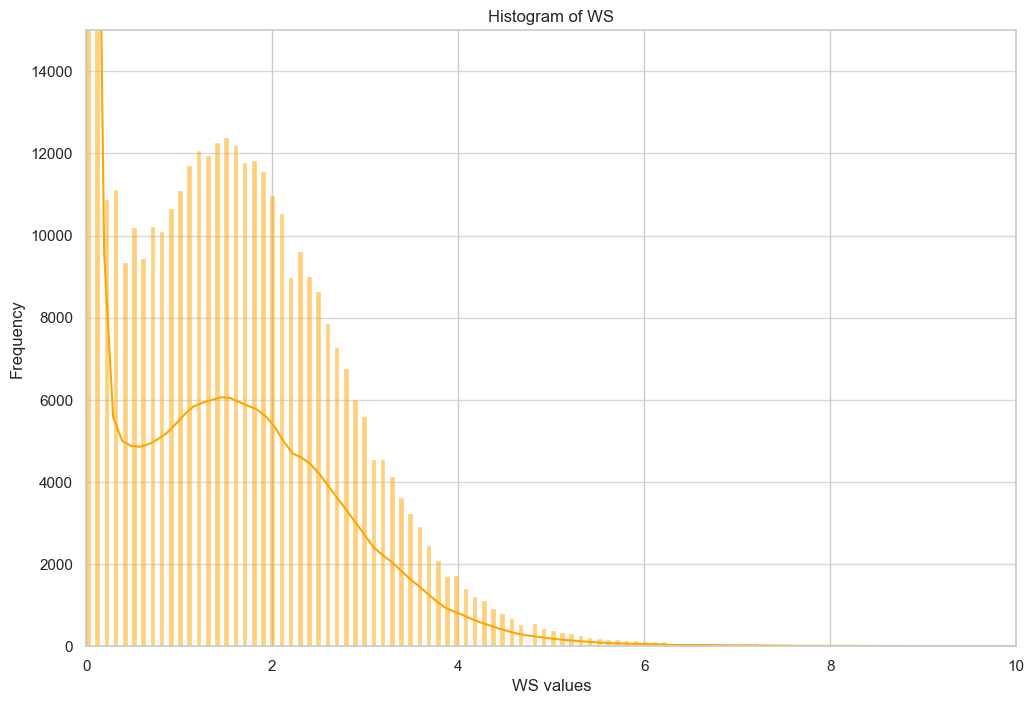

In [36]:
plt.figure(figsize=(12, 8)) 
sns.histplot(data=df, x='WS', kde=True, color='orange') # Histogram for WS, using a different color
plt.title('Histogram of WS') # Add a title
plt.xlabel('WS values') # Add x-axis label
plt.xlim(0, 10)
plt.ylabel('Frequency') # Add y-axis label
plt.ylim(0,15000)
plt.grid(axis='y', alpha=0.75) # Add a grid
plt.show() 

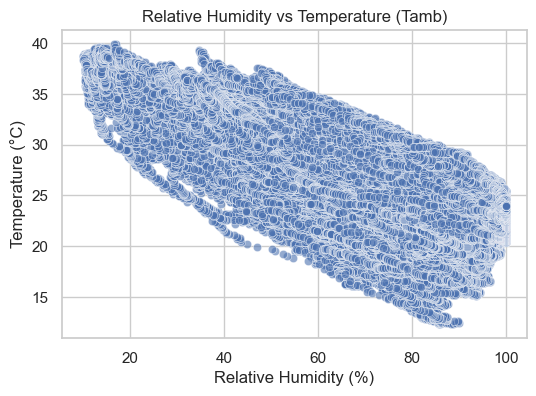

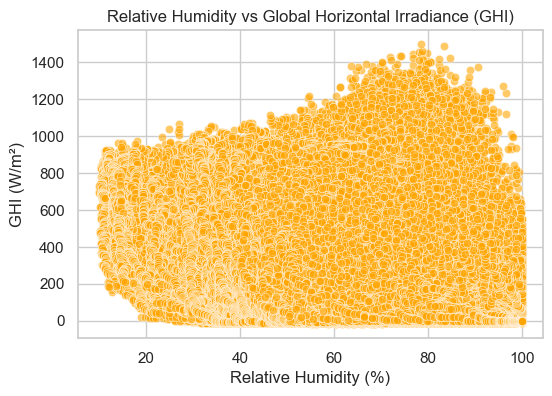

In [37]:

sns.set(style="whitegrid")

# RH vs Tamb
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.6)
plt.title('Relative Humidity vs Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.show()

# RH vs GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.6, color='orange')
plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.show()


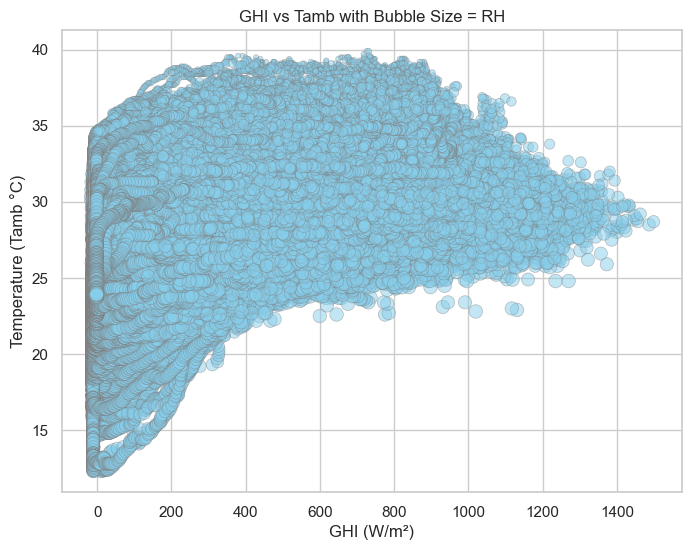

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5, c='skyblue', edgecolors='grey', linewidth=0.5)
plt.title('GHI vs Tamb with Bubble Size = RH')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Temperature (Tamb °C)')
plt.grid(True)
plt.show()


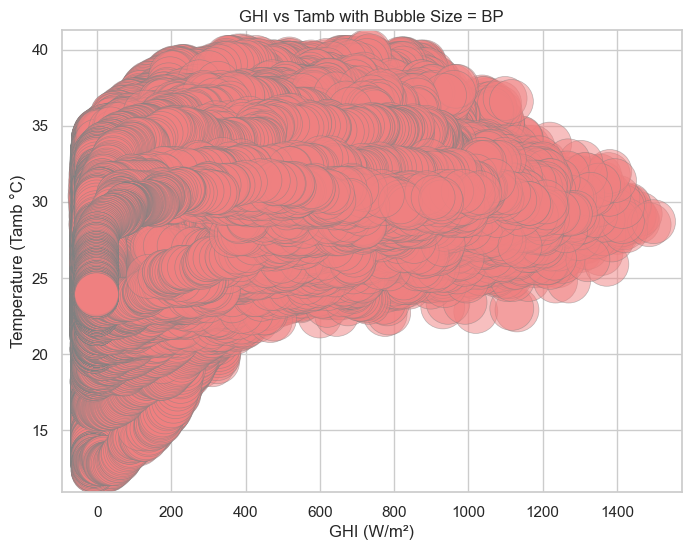

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['BP'], alpha=0.5, c='lightcoral', edgecolors='grey', linewidth=0.5)
plt.title('GHI vs Tamb with Bubble Size = BP')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Temperature (Tamb °C)')
plt.grid(True)
plt.show()
